# Question 8: Face Detection & Body detection (1.0 điểm)
### Requirement 1: Face Detection
- Detect face with and without glasses.
- Input: image => Output: faces and eyes (in image) have boundary rectangles.
- Example: Input (face_glasses_1.jpg) => Output (face_glasses_1_output.jpg)

### Requirement 2: Body detection
- Detect body .
- Input: image => Output: bodies (in image) have boundary rectangles.
- Example: Input (body.jpg) => Output (body_output.png)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, Model, Sequential
from tensorflow.keras.layers import Dense, Input

from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV

In [2]:
import requests
import cv2
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
%cd '/content/gdrive/My Drive/LDS8_K275_ONLINE_DinhVietTrung'

Mounted at /content/gdrive
/content/gdrive/My Drive/LDS8_K275_ONLINE_DinhVietTrung


In [5]:
print(tf.__version__)
print(keras.__version__)

2.8.2
2.8.0


### **Face Detection**

In [25]:
face_cascade = cv2.CascadeClassifier('data/FaceDetection_xml/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('data/FaceDetection_xml/haarcascade_eye.xml')


# face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'data/FaceDetection_xml/haarcascade_frontalface_default.xml')
# eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'data/FaceDetection_xml/haarcascade_eye.xml')

In [26]:
def detect(RGBimg,scaleFactor_face=1.3,minNeigbor_face=3,scaleFactor_eye=1.3,minNeigbor_eye=3):
    gray = cv2.cvtColor(RGBimg,cv2.COLOR_RGB2GRAY)
    faces = face_cascade.detectMultiScale(gray, scaleFactor_face, minNeigbor_face)
    color_img = RGBimg.copy()
    for (x, y, w, h) in faces:
        cv2.rectangle(color_img, (x, y), (x+w, y+h), (255, 0, 0), 4)
        roi_gray = gray[y:y+h, x:x+w] 
        roi_color = color_img[y:y+h, x:x+w] 
        eyes = eye_cascade.detectMultiScale(roi_gray, scaleFactor_eye, minNeigbor_eye) 
        for (ex, ey, ew, eh) in eyes:
            cv2.rectangle(roi_color,(ex, ey),(ex+ew, ey+eh), (0, 255, 0), 3) 
    return color_img

In [27]:
path = 'data/Dataset/face_glasses_1.jpg'


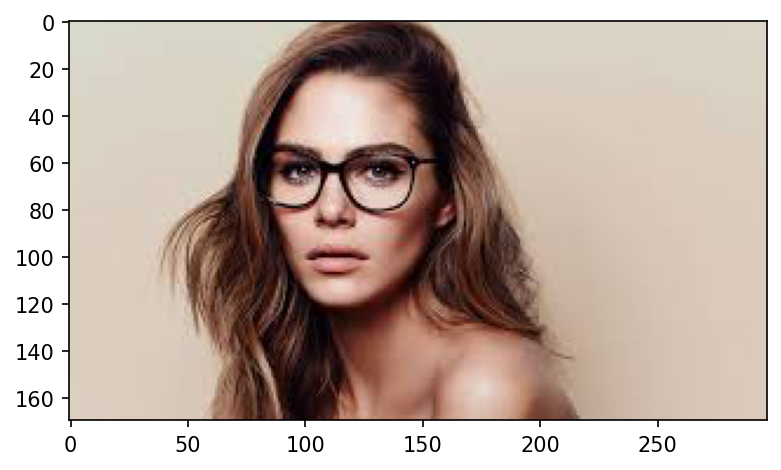

In [28]:
img = Image.open(path)
img = np.asarray(img,dtype='uint8')
plt.figure(dpi=150)
plt.imshow(img)
plt.show()

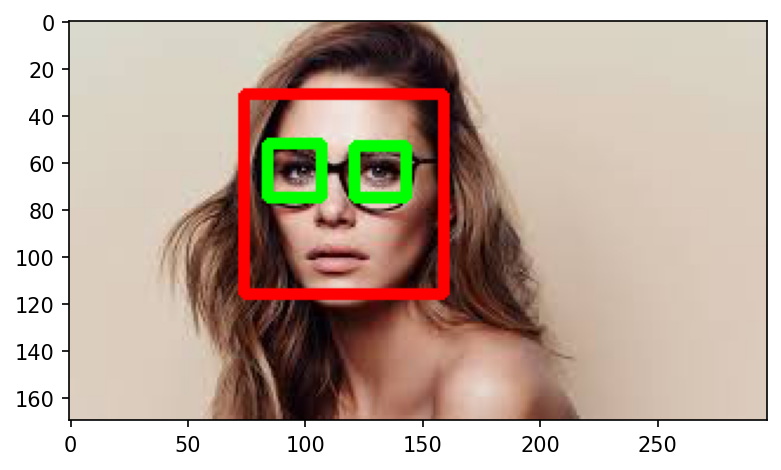

In [49]:
plt.figure(dpi=150)
plt.imshow(detect(img, 1.2,2,1.02,2))
plt.show()

### **Body detection**

In [50]:
body_cascade = cv2.CascadeClassifier('data/FaceDetection_xml/haarcascade_fullbody.xml')


In [51]:
def detect_body(RGBimg,scaleFactor=1.2,minNeigbor=5):
    gray = cv2.cvtColor(RGBimg,cv2.COLOR_RGB2GRAY)
    faces = body_cascade.detectMultiScale(gray, scaleFactor, minNeigbor)
    color_img = RGBimg.copy()
    for (x, y, w, h) in faces:
        cv2.rectangle(color_img, (x, y), (x+w, y+h), (255, 0, 0), 2)
    return color_img

In [53]:
%pwd

'/content/gdrive/MyDrive/LDS8_K275_ONLINE_DinhVietTrung'

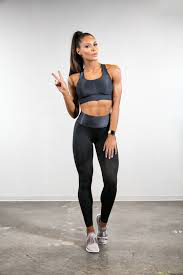

In [55]:
img2 = Image.open('data/Dataset/ body.jpg') 
img2

In [56]:
img2 = np.asarray(img2,dtype='uint8')
neighbor = 3
while neighbor <= 10:
    scale = 1.1
    while scale <= 1.9:
        plt.imsave('Bodyscale_'+str(scale)+'_neighbor_'+str(neighbor)+'.jpg',detect_body(img2,scale,neighbor))
        scale+=0.01
    neighbor+=1

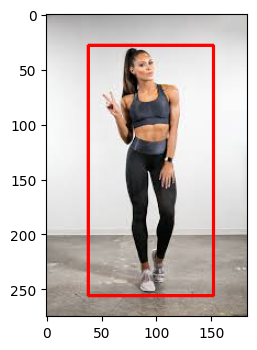

In [57]:
plt.figure(dpi=100)
plt.imshow(detect_body(img2,1.22,3)) # với scaleFactor = 1.22 và minNeighbors = 3 thì đẹp nhất
plt.show()